In [ ]:
!pip install neuralprophet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [ ]:
df = pd.read_csv("../Nizamabad.csv")
df.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)

  exec(code_obj, self.user_global_ns, self.user_ns)



,Unnamed: 0,row_id,District,Mandal,location,Date,Rainfall (mm),temp_min,temp_max,humidity_min,...,humidity_min (%),Humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph),Unnamed: 0.1.1,humidity_max (%),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,0,0.0,Medchal-Malkajgiri,Uppal,Moulali,01-01-2018,0.0,12.1,32.6,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Medchal-Malkajgiri,Uppal,Moulali,02-01-2018,0.0,11.6,32.6,23.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,Medchal-Malkajgiri,Uppal,Moulali,03-01-2018,0.0,13.0,33.0,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,Medchal-Malkajgiri,Uppal,Moulali,04-01-2018,0.0,9.7,31.7,27.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,Medchal-Malkajgiri,Uppal,Moulali,05-01-2018,0.0,8.8,31.0,28.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'row_id', 'District', 'Mandal', 'location', 'Date',
       'Rainfall (mm)', 'temp_min', 'temp_max', 'humidity_min', 'humidity_max',
       'wind_speed_min', 'wind_speed_max', 'Unnamed: 0.1', 'humidity_min (%)',
       'Humidity_max (%)', 'wind_speed_min (Kmph)', 'wind_speed_max (Kmph)',
       'Unnamed: 0.1.1', 'humidity_max (%)', 'Min Humidity (%)',
       'Max Humidity (%)', 'Min Wind Speed (Kmph)', 'Max Wind Speed (Kmph)'],
      dtype='object')

In [ ]:
df = df.query('Mandal == "Nizamabad North" or Mandal == "Nizamabad_North"')
df

,Unnamed: 0,row_id,District,Mandal,location,Date,Rainfall (mm),temp_min,temp_max,humidity_min,...,humidity_min (%),Humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph),Unnamed: 0.1.1,humidity_max (%),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
234798,234798,234798.0,Nizamabad,Nizamabad North,Nizamabad_North,01-01-2018,0.0,15.7,34.7,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234799,234799,234799.0,Nizamabad,Nizamabad North,Nizamabad_North,02-01-2018,0.0,15.8,35.9,20.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234800,234800,234800.0,Nizamabad,Nizamabad North,Nizamabad_North,03-01-2018,0.0,16.1,34.2,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234801,234801,234801.0,Nizamabad,Nizamabad North,Nizamabad_North,04-01-2018,0.0,15.7,34.4,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234802,234802,234802.0,Nizamabad,Nizamabad North,Nizamabad_North,05-01-2018,0.0,17.0,32.9,24.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167640,156157,NaN,Nizamabad,Nizamabad_North,NaN,26-Sep-22,0.0,22.8,34.6,NaN,...,NaN,NaN,NaN,NaN,11815.0,NaN,57.6,100.0,0.0,4.9
1167641,156158,NaN,Nizamabad,Nizamabad_North,NaN,27-Sep-22,15.8,22.5,34.6,NaN,...,NaN,NaN,NaN,NaN,11816.0,NaN,66.2,100.0,0.0,7.6
1167642,156159,NaN,Nizamabad,Nizamabad_North,NaN,28-Sep-22,1.0,23.5,34.1,NaN,...,NaN,NaN,NaN,NaN,11817.0,NaN,70.3,100.0,0.0,9.9
1167643,156160,NaN,Nizamabad,Nizamabad_North,NaN,29-Sep-22,0.0,23.2,34.5,NaN,...,NaN,NaN,NaN,NaN,11818.0,NaN,70.8,100.0,0.0,10.4


In [ ]:
df.dtypes

Unnamed: 0                 int64
row_id                   float64
District                  object
Mandal                    object
location                  object
Date                      object
Rainfall (mm)            float64
temp_min                 float64
temp_max                 float64
humidity_min             float64
humidity_max             float64
wind_speed_min           float64
wind_speed_max           float64
Unnamed: 0.1             float64
humidity_min (%)          object
Humidity_max (%)         float64
wind_speed_min (Kmph)    float64
wind_speed_max (Kmph)    float64
Unnamed: 0.1.1           float64
humidity_max (%)         float64
Min Humidity (%)         float64
Max Humidity (%)         float64
Min Wind Speed (Kmph)    float64
Max Wind Speed (Kmph)    float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,row_id,District,Mandal,location,Date,Rainfall (mm),temp_min,temp_max,humidity_min,...,humidity_min (%),Humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph),Unnamed: 0.1.1,humidity_max (%),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
234798,234798,234798.0,Nizamabad,Nizamabad North,Nizamabad_North,2018-01-01,0.0,15.7,34.7,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234799,234799,234799.0,Nizamabad,Nizamabad North,Nizamabad_North,2018-02-01,0.0,15.8,35.9,20.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234800,234800,234800.0,Nizamabad,Nizamabad North,Nizamabad_North,2018-03-01,0.0,16.1,34.2,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234801,234801,234801.0,Nizamabad,Nizamabad North,Nizamabad_North,2018-04-01,0.0,15.7,34.4,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234802,234802,234802.0,Nizamabad,Nizamabad North,Nizamabad_North,2018-05-01,0.0,17.0,32.9,24.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


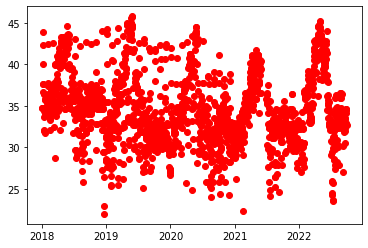

In [ ]:
plt.plot(df['Date'], df['temp_max'], 'ro')
plt.show()

In [ ]:
print(len(df.Date.unique()))

1676


In [ ]:
data = df[['Date', 'temp_max']]
data

,Date,temp_max
234798,2018-01-01,34.7
234799,2018-02-01,35.9
234800,2018-03-01,34.2
234801,2018-04-01,34.4
234802,2018-05-01,32.9
...,...,...
1167640,2022-09-26,34.6
1167641,2022-09-27,34.6
1167642,2022-09-28,34.1
1167643,2022-09-29,34.5


In [9]:
m = NeuralProphet()

In [ ]:
data.dtypes

Date        datetime64[ns]
temp_max           float64
dtype: object

In [ ]:
data.columns = ['ds', 'y'] 
data.head()

,ds,y
234798,2018-01-01,34.7
234799,2018-02-01,35.9
234800,2018-03-01,34.2
234801,2018-04-01,34.4
234802,2018-05-01,32.9


In [ ]:
len(data.ds.unique())

1676

In [3]:
data = pd.read_csv(r"C:\Users\sevan\Downloads\Nizamabad.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'ds', 'y'], dtype='object')

In [5]:
data = data[['ds', 'y']]

In [6]:
data.to_csv(r"C:\Users\sevan\Downloads\Nizamabad.csv")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\sevan\\Downloads\\Nizamabad.csv'

In [7]:
print(len(data.ds.unique()))
print(len(data.ds))

1676
1676


In [ ]:
model = m.fit(data, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_dat

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '20-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '22-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '30-03-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '31-03-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-05-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '20-05-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-05-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-06-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '27-06-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '28-06-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '15-08-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '16-08-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '17-08-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '22-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '23-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '24-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '30-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '31-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '20-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '27-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '28-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '17-03-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '18-03-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-03-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '24-04-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '25-04-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-04-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-06-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '14-06-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '15-06-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-07-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '22-07-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '23-07-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '28-08-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '29-08-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '30-08-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '17-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '18-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '24-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '25-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '14-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '15-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '20-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '22-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '29-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '30-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '31-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '18-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '20-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '25-06-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-06-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '27-06-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '14-08-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '15-08-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '16-08-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '22-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '23-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '29-10-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '30-10-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '31-10-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '18-12-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-12-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '20-12-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '25-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '27-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '16-03-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '17-03-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '18-03-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '23-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '24-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '25-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '31-05-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-07-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '14-07-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '20-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-09-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '27-09-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '28-09-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '15-11-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '16-11-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '17-11-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '23-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '24-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '25-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '30-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '31-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '21-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '22-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '23-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '28-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '29-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '30-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '17-06-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '18-06-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '19-06-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '25-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '26-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '27-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '13-09-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '14-09-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - C:\Users\sevan\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:437: UserWarning: Parsing '15-09-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnms

Finding best initial lr:   0%|          | 0/231 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
future = m.make_future_dataframe(data, periods=387)
forecast = m.predict(future)
forecast.head()

In [ ]:
nizamabad_forecast = forecast[['ds', 'yhat1']]
nizamabad_forecast = nizamabad_forecast[22:]

In [ ]:
nizamabad_forecast

,ds,yhat1
22,2023-01-01,33.470047
23,2023-01-02,33.202095
24,2023-01-03,33.495087
25,2023-01-04,33.548332
26,2023-01-05,33.461800
...,...,...
382,2023-12-27,34.174713
383,2023-12-28,34.063717
384,2023-12-29,34.139038
385,2023-12-30,34.180000
